In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import cv2

In [9]:
#load_data
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

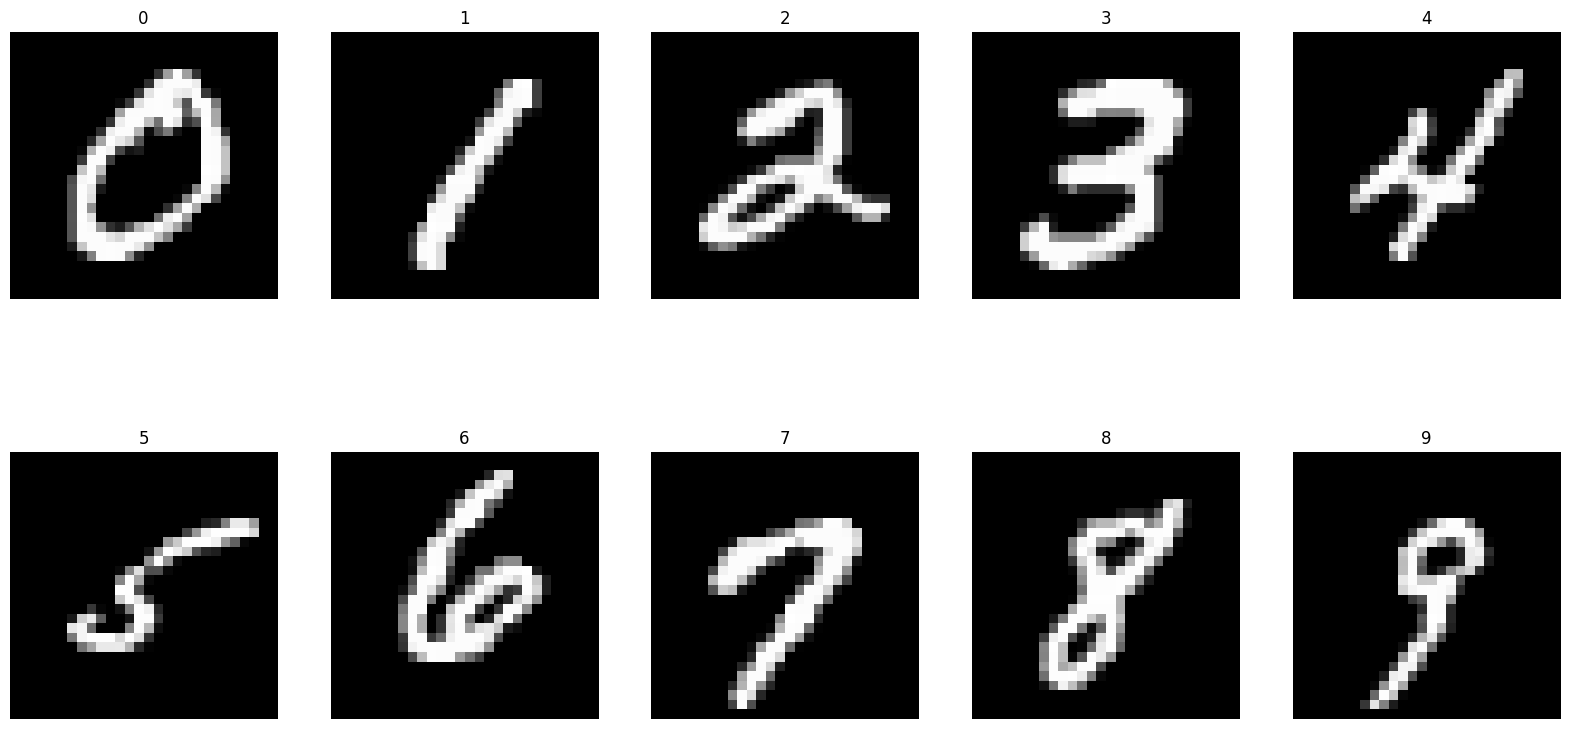

In [12]:
classes = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(20,10))
j = 0
for i in range(len(x_train)):
    if j == y_train[i]:
        plt.subplot(2,5,j+1)
        plt.axis('off')
        plt.imshow(x_train[i],cmap='gray')
        plt.title(classes[int(y_train[i])])
        # for_save = cv2.cvtColor(x_train[i],cv2.COLOR_BGR2GRAY)
        for_save = cv2.resize(x_train[i],(200,200))
        plt.imsave('class_images/' + f'{classes[int(y_train[i])]}'+ '.png',for_save)
        j += 1

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3),input_shape = (28,28,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(1200,activation='relu'),
    keras.layers.Dense(600,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(x_train,y_train,
          epochs=4,
          validation_split = 0.33)

Epoch 1/4
1257/1257 [==============================] - 47s 36ms/step - loss: 0.1512 - accuracy: 0.9517 - val_loss: 0.0704 - val_accuracy: 0.9787
Epoch 2/4
1257/1257 [==============================] - 39s 31ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0694 - val_accuracy: 0.9803
Epoch 3/4
1257/1257 [==============================] - 45s 36ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 4/4
1257/1257 [==============================] - 44s 35ms/step - loss: 0.0311 - accuracy: 0.9905 - val_loss: 0.0754 - val_accuracy: 0.9833


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0625 - accuracy: 0.9851


[0.06253411620855331, 0.9850999712944031]

In [18]:
model.save('model/mnist_model.h5')

In [19]:
sample = np.array([x_test[1]])
np.argmax(model.predict(sample))

1/1 [==============================] - 0s 92ms/step


2

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
history.history['accuracy']

[0.9517400860786438,
 0.9827358722686768,
 0.9884822964668274,
 0.9905221462249756]

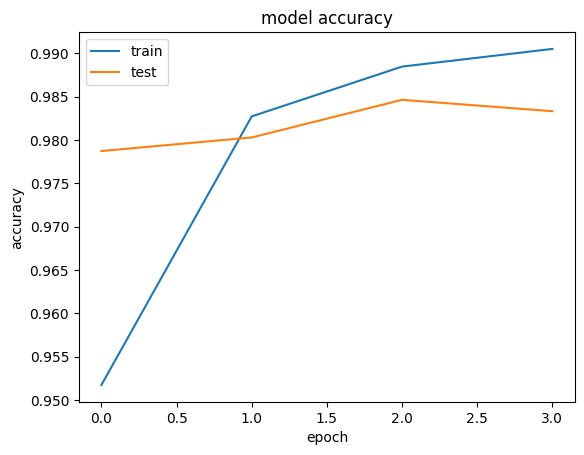

In [22]:
# plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

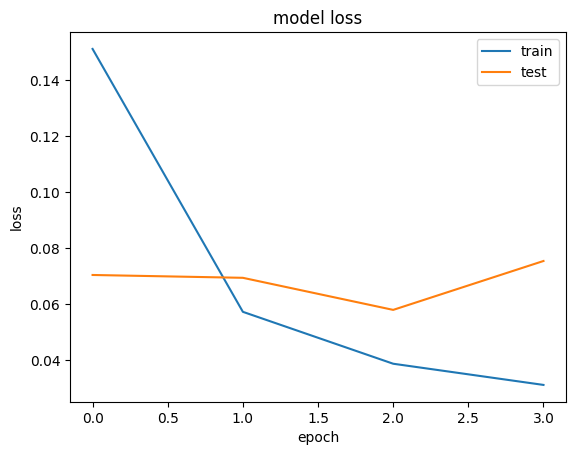

In [23]:
# plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()